# Predecir ingresos por persona

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
dataframe = pd.read_csv('./encuesta-anual-hogares-2018.csv', encoding='latin1')
dataframe.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,NaN,No corresponde
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,NaN,No corresponde
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,NaN,No corresponde
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
5,4,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,16500,Asiste,Privado no religioso,Universitario,Otras escuelas especiales,12,Pais no limitrofe,Solo sistema publico,NaN,No corresponde
6,5,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
7,5,1,2,2,Resto de la Ciudad,22,Mujer,Otro familiar,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,16,PBA excepto GBA,Solo obra social,No,No corresponde
8,6,1,1,7,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,300,Tuvo ingresos pero no declara monto,800,Tuvo ingresos pero no declara monto,15300,7650,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Pais limitrofe,Solo sistema publico,No,No corresponde
9,6,1,2,7,Resto de la Ciudad,23,Mujer,Otro familiar,Soltero/a,Pad

In [4]:
q1 = dataframe['ingreso_total_lab'].quantile(0.25)
q3 = dataframe['ingreso_total_lab'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
dataframe = dataframe[(dataframe['ingreso_total_lab'] >= lower_bound) & (dataframe['ingreso_total_lab'] <= upper_bound)]


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13623 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13623 non-null  int64 
 1   nhogar                       13623 non-null  int64 
 2   miembro                      13623 non-null  int64 
 3   comuna                       13623 non-null  int64 
 4   dominio                      13623 non-null  object
 5   edad                         13623 non-null  int64 
 6   sexo                         13623 non-null  object
 7   parentesco_jefe              13623 non-null  object
 8   situacion_conyugal           13622 non-null  object
 9   num_miembro_padre            13623 non-null  object
 10  num_miembro_madre            13623 non-null  object
 11  estado_ocupacional           13623 non-null  object
 12  cat_ocupacional              13623 non-null  object
 13  calidad_ingresos_lab         13623 n

se hace un info para ver los valores faltantes, se procede a ir reemplazando

# Reemplazo de valores faltantes

un array con las columnas con valores faltantes para ir teniendo de referencia
en todas las columnas salvo nivel_max_educativo se descartaron los datos debido a que la cantidad faltante era bastante baja en comparacion con el tamaño del dataset, otro problema que se presenta para reemplazar es que no se encontro un valor especifico por el cual reemplazar estos valores

### nivel_max_educativo
1000 valores faltantes aproximadamente
con esta variable lo que se hizo fue filtrar dependiendo la edad los valores faltantes y ver que la mayoria de valores faltantes 700 aproximadamente eran de personas con edad menor a 6 años por lo que se reemplazo por 0, coon el resto de valores terminaron siendo descartados, de vuelta se tiene el problema de por que valor lo tendria que reemplazar, descartarlos evita el problema de añadir informacion falsa al problema

In [6]:
columnas_val_faltantes = dataframe.columns[dataframe.isnull().any()].tolist()

if columnas_val_faltantes:
    print(f"Columnas con nan: {', '.join(columnas_val_faltantes)}")
else:
    print("clean")

Columnas con nan: situacion_conyugal, sector_educativo, nivel_max_educativo, años_escolaridad, lugar_nacimiento, afiliacion_salud, hijos_nacidos_vivos, cantidad_hijos_nac_vivos


# hijos_nac_vivos

esta columna tenia aprox 5 mil valores faltantes pero al compararla con la columna de al lado cantidad_hijos_nac_vivos se veia que coincidian los valores faltantes con las personas que tenian 0 (no corresponde antes del cambio). por lo cual se llenaron los valores faltantes con 'No'

+ ((dataframe['hijos_nacidos_vivos'].isnull()) & (dataframe['cantidad_hijos_nac_vivos'] == 0)).value_counts() este filtro fue util para revisar si el cambio era correcto

In [7]:
dataframe[dataframe['hijos_nacidos_vivos'].isna()]
dataframe['hijos_nacidos_vivos'] = dataframe['hijos_nacidos_vivos'].fillna('No')

# cantidad_hijos_nacidos_vivos

para la cantidad de hijos nacidos se asume que 0 equivale a no corresponde ya que coincidia con las filas de la columna hijos_nacidos_vivos cuando esta era igual a No. Por lo que se va a cambiar por 0, y se va a castear la columna a int ya que cambiando este valor toda la columna tiene valores numericos.
Luego de esto solo quedan dos valores faltantes los cuales se descartan

In [8]:
dataframe[dataframe['cantidad_hijos_nac_vivos'].isna()]

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
12861,4857,1,2,4,Resto de la Ciudad,71,Mujer,Otro familiar,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,16600,8300,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,Partido GBA,Solo obra social,No,NaN
14415,5773,1,1,14,Resto de la Ciudad,91,Mujer,Jefe,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,12000,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Otros,Si,NaN


In [9]:
dataframe.dropna(subset =['cantidad_hijos_nac_vivos'], inplace=True)

In [10]:
reemplazo = {"No corresponde": 0}
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].replace(reemplazo)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].astype(int)


# Situacion conyugal

Se descarto el valor en esta columna

In [11]:
dataframe['situacion_conyugal'].unique()

#dataframe[dataframe['situacion_conyugal'].isnull()] ['edad'].value_counts()

array(['Soltero/a', 'Unido/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Casado/a', 'Viudo/a',
       'Divorciado/a', nan], dtype=object)

In [12]:
dataframe['situacion_conyugal'].value_counts()
dataframe['situacion_conyugal'].isna().sum()

1

In [13]:
dataframe.dropna(subset =['situacion_conyugal'], inplace=True)

# Sector educativo

a esta variable le faltan solo dos datos los cuales seran descartados

In [14]:
dataframe['sector_educativo'].unique()

array(['No corresponde', 'Estatal/publico', 'Privado no religioso',
       'Privado religioso', nan], dtype=object)

In [15]:
dataframe['sector_educativo'].value_counts()

dataframe[dataframe['sector_educativo'].isnull()] ['edad'].value_counts()

edad
12    1
1     1
Name: count, dtype: int64

In [16]:
dataframe['sector_educativo'] = dataframe['sector_educativo'].fillna('No corresponde')

# nivel_max_educativo
este es el que tendria que ver porque le faltan 1000 valores aprox

In [17]:
dataframe['nivel_max_educativo'].unique()

array(['EGB (1° a 9° año)', 'Sala de 5', nan, 'Otras escuelas especiales',
       'Primario especial', 'Primario comun', 'Secundario/medio comun',
       'No corresponde'], dtype=object)

In [18]:
dataframe['nivel_max_educativo'].value_counts()

nivel_max_educativo
Secundario/medio comun       2850
Otras escuelas especiales    2457
Primario especial            2260
EGB (1° a 9° año)            2210
Sala de 5                    1656
Primario comun               1018
No corresponde                 60
Name: count, dtype: int64

In [19]:
dataframe['nivel_max_educativo'].isna().sum()

1109

In [20]:
dataframe.loc[(dataframe['nivel_max_educativo'].isnull()) & (dataframe['edad'] >= 0) & (dataframe['edad'] <= 6), "nivel_max_educativo"] = "No corresponde"

In [21]:
dataframe[dataframe['nivel_max_educativo'].isnull()] ['edad'].value_counts()
dataftame = dataframe[dataframe['nivel_max_educativo'].isnull() ]

In [22]:
dataframe.dropna(subset =['nivel_max_educativo'], inplace=True)

# años_escolaridad
a esta variable se le cambia ningun año aprobado por 0 para despues poder castear la columna a enteros

tengo 85 valores faltantes, al no ser una cantidad tan significativa seran descartados

In [23]:
dataframe['años_escolaridad'].isna().sum()

81

In [24]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].replace("Ningun año de escolaridad aprobado", 0)

In [25]:
dataframe['años_escolaridad'].unique()

array(['7', '8', '3', 0, '12', '16', '9', '11', '15', '14', '13', '5',
       '10', '17', '4', '1', '19', '6', '18', '2', nan], dtype=object)

In [26]:
dataframe.dropna(subset =['años_escolaridad'], inplace=True)
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].astype(int)

In [27]:
dataframe['años_escolaridad'].isna().sum()

0

# lugar_nacimiento

en esta variable tambien solo falta un valor el que se procede a descartarse

In [28]:
dataframe['lugar_nacimiento'].unique()

array(['Pais limitrofe', 'CABA', 'PBA excepto GBA', 'Pais no limitrofe',
       'Otra provincia', 'Partido GBA', 'PBA sin especificar', nan],
      dtype=object)

In [29]:
dataframe['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                   8231
Otra provincia         1511
Pais limitrofe         1302
Pais no limitrofe       999
Partido GBA             935
PBA excepto GBA         514
PBA sin especificar       8
Name: count, dtype: int64

In [30]:
dataframe['lugar_nacimiento'].isna().sum()

1

In [31]:
dataframe.dropna(subset =['lugar_nacimiento'], inplace=True)

# afiliacion_salud
al igual que la variable anterior solo falta un valor y se va a descartar


In [32]:
dataframe['afiliacion_salud'].unique()

array(['Solo sistema publico', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Otros'], dtype=object)

In [33]:
dataframe['afiliacion_salud'].value_counts()

afiliacion_salud
Solo obra social                                             6303
Solo sistema publico                                         3196
Solo prepaga o mutual via OS                                 2029
Solo plan de medicina prepaga por contratación voluntaria    1106
Otros                                                         866
Name: count, dtype: int64

In [34]:
dataframe['afiliacion_salud'].isna().sum()

0

In [35]:
dataframe.dropna(subset=['afiliacion_salud'], inplace=True)

# Analisis de datos

In [36]:
dataframe.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,No,0
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,No,0
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,No corresponde,0,CABA,Solo sistema publico,No,0
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0


In [37]:
dataframe.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000
mean,2716.586370,1.010074,2.197852,7.453259,38.085111,9450.105778,4216.879259,13666.985037,43469.884074,15584.875037,10.408815,0.647704
std,1555.241244,0.107718,1.331174,4.230204,23.625039,12674.662798,11260.295016,15515.829783,35414.014457,13081.112188,5.268709,1.240192
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1455.000000,1.000000,1.000000,4.000000,19.000000,0.000000,0.000000,0.000000,20000.000000,7000.000000,7.000000,0.000000
50%,2593.000000,1.000000,2.000000,8.000000,35.000000,0.000000,0.000000,9300.000000,35000.000000,12500.000000,12.000000,0.000000
75%,3934.250000,1.000000,3.000000,11.000000,57.000000,18000.000000,4000.000000,22000.000000,57000.000000,20359.250000,15.000000,1.000000
max,5826.000000,4.000000,13.000000,15.000000,99.000000,49000.000000,319000.000000,319000.000000,422000.000000,172000.000000,19.000000,14.000000


In [38]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13500 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13500 non-null  int64 
 1   nhogar                       13500 non-null  int64 
 2   miembro                      13500 non-null  int64 
 3   comuna                       13500 non-null  int64 
 4   dominio                      13500 non-null  object
 5   edad                         13500 non-null  int64 
 6   sexo                         13500 non-null  object
 7   parentesco_jefe              13500 non-null  object
 8   situacion_conyugal           13500 non-null  object
 9   num_miembro_padre            13500 non-null  object
 10  num_miembro_madre            13500 non-null  object
 11  estado_ocupacional           13500 non-null  object
 12  cat_ocupacional              13500 non-null  object
 13  calidad_ingresos_lab         13500 n

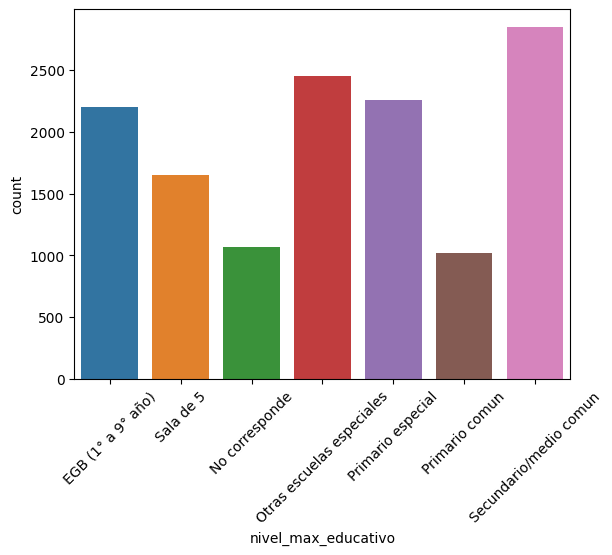

In [39]:
sns.countplot(x=dataframe['nivel_max_educativo'])
plt.xticks(rotation=45)
plt.show()

## Boxplot ingresos en funcion de años de escolaridad
con este grafico podemos observar que a medida que aumentan los años de escolaridad *parecen* aumentan los ingresos total laborables

<Axes: xlabel='años_escolaridad', ylabel='ingreso_total_lab'>

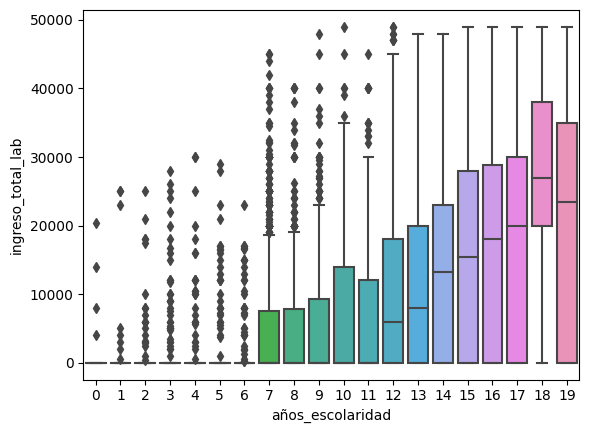

In [40]:
sns.boxplot(x=dataframe['años_escolaridad'], y=dataframe['ingreso_total_lab'])

## Boxplot ingreso total laborable
+ La distribucion de los datos es asimetrica hacia la derecha
esto tiene sentido ya que hay varias personas en el dataset que no trabajan o no tienen edad para trabajar (ponele), 
+ podemos ver que la media es de aproximadamente 13300 pesos, lo cual se aproxima al salario minimo de 2018 (11 mil pesos)

http://www.siasueldos.com/salario-m%C3%ADnimo-vital-y-m%C3%B3vil-actualizaci%C3%B3n-de-montos-septiembre-y-diciembre-2018#:~:text=24%20Septiembre%202018-,SALARIO%20M%C3%8DNIMO%20VITAL%20Y%20M%C3%93VIL%2DACTUALIZACI%C3%93N%20DE%20MONTOS%2DSEPTIEMBRE%20Y,%3A%20%24%2011.300%2C%2D%20mensuales.

+ Encontramos muchos valores atipicos lo que representa que los sueldos mas altos le corresponden a pocsas personas y la mayoria de personas tiene sueldos mas bajos

In [41]:
dataframe['ingreso_total_lab'].describe()

count    13500.000000
mean      9450.105778
std      12674.662798
min          0.000000
25%          0.000000
50%          0.000000
75%      18000.000000
max      49000.000000
Name: ingreso_total_lab, dtype: float64

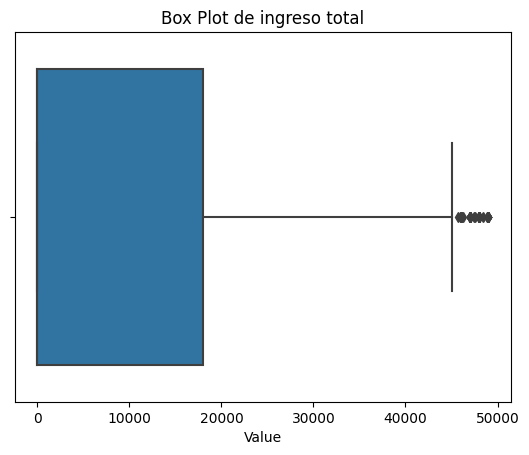

In [42]:
#dataframe['ingreso_total_lab_log'] = np.log(dataframe['ingreso_total_lab'])
sns.boxplot(x=dataframe['ingreso_total_lab'])
plt.title('Box Plot de ingreso total')
plt.xlabel('Value')
plt.show()

## Vemos la escolaridad podemos ver que en promedio las personas tienen 12 años de escolaridad lo que equivaldria a un secundario completo
+ con un describe vemos que la media esta mas cerca de 0 que la mediana, esto se debe a que hay personas que aun son muy jovenes como para ir a la escuela como tambien hay gente que no asistio o no la termino

In [43]:
dataframe['años_escolaridad'].describe()

count    13500.000000
mean        10.408815
std          5.268709
min          0.000000
25%          7.000000
50%         12.000000
75%         15.000000
max         19.000000
Name: años_escolaridad, dtype: float64

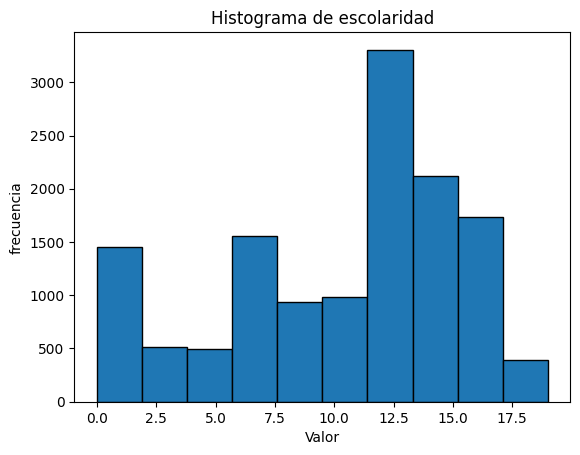

In [44]:
plt.hist(dataframe['años_escolaridad'], bins=10, edgecolor='black')
plt.title('Histograma de escolaridad')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

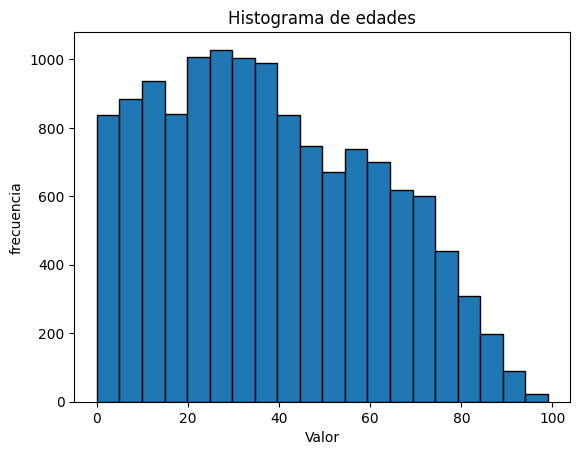

In [45]:
plt.hist(dataframe['edad'], bins=20, edgecolor='black')
plt.title('Histograma de edades')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

## Hijos_nacidos_vivos
+ El nombre de esta variable es un poco confuso, se puede asumir que se refiere a partos
+ La idea es que No representa que la persona no tiene hijos
+ Si representa que si tiene hijos

<Axes: xlabel='hijos_nacidos_vivos', ylabel='count'>

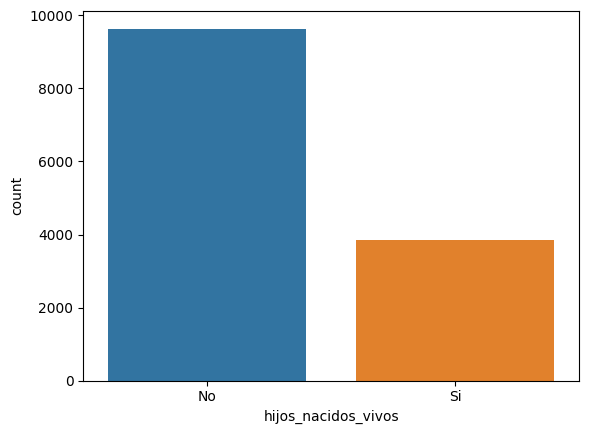

In [46]:
sns.countplot(x='hijos_nacidos_vivos', data=dataframe)

## Dominio
Usamos este plot para ver como se distribuye la gente si en partes de la ciudad o una villa de emergencia

<Axes: xlabel='dominio', ylabel='count'>

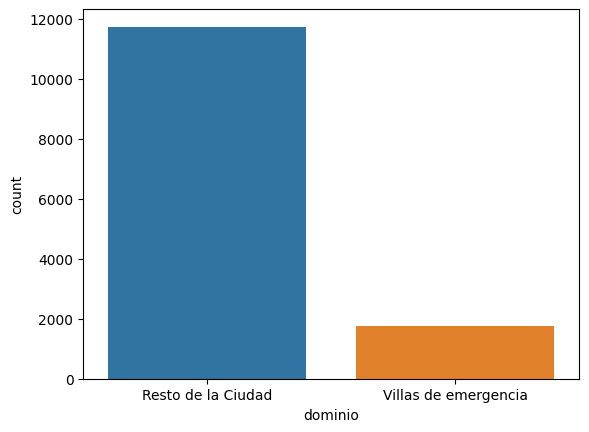

In [47]:
sns.countplot(x='dominio', data=dataframe)

In [48]:
cantidad_situacion_conyugal = dataframe['situacion_conyugal'].value_counts()

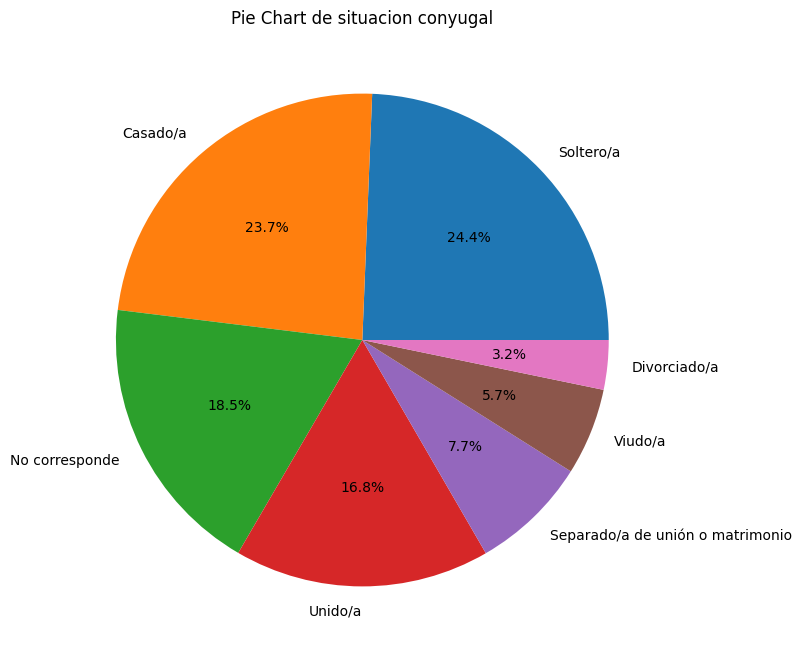

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_situacion_conyugal, labels=cantidad_situacion_conyugal.index, autopct='%1.1f%%')
plt.title('Pie Chart de situacion conyugal')
plt.show()

<Axes: xlabel='edad', ylabel='situacion_conyugal'>

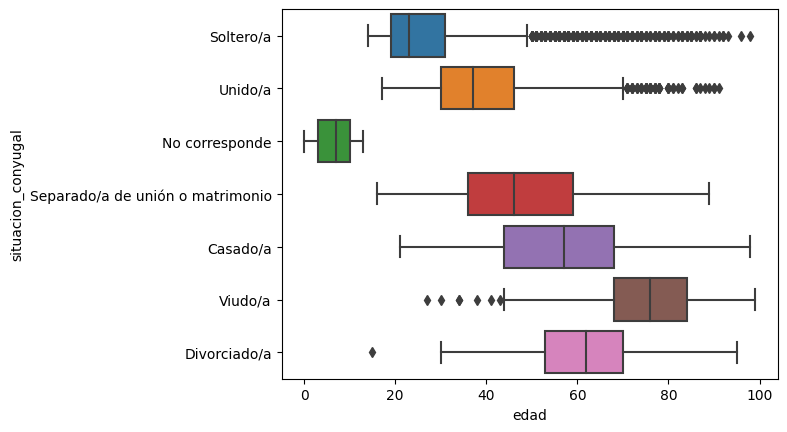

In [50]:
sns.boxplot(x=dataframe['edad'], y=dataframe['situacion_conyugal'])

In [51]:
cantidad_afiliacion_salud = dataframe['afiliacion_salud'].value_counts()

## afiliacion_salud
+ vemos la proporcion de personas que tienen cada servicio
+ despues hacemos un boxplot en funcion de los ingresos para ver si hay alguna relacion entre estas variables

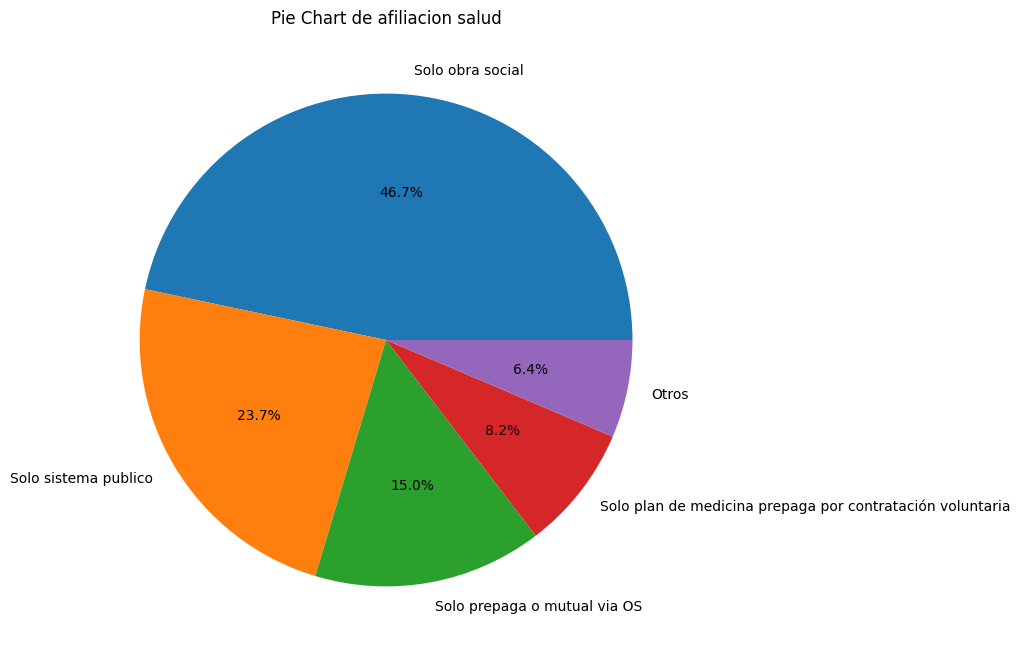

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_afiliacion_salud, labels=cantidad_afiliacion_salud.index, autopct='%1.1f%%')
plt.title('Pie Chart de afiliacion salud')
plt.show()

Text(0.5, 1.0, 'Grafico de Afiliacion_salud en funcion de los ingresos')

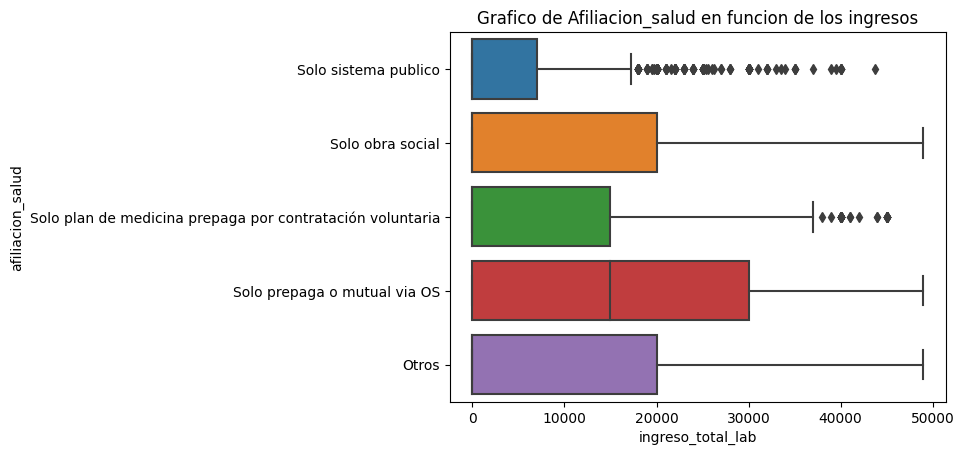

In [53]:
sns.boxplot(x=dataframe['ingreso_total_lab'], y=dataframe['afiliacion_salud'])
plt.title("Grafico de Afiliacion_salud en funcion de los ingresos")

# correlaciones
en las variables numericas

<Axes: >

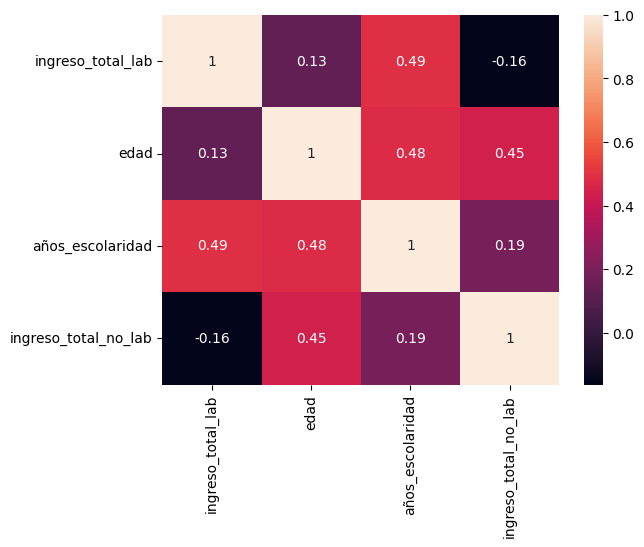

In [54]:
sns.heatmap(dataframe[['ingreso_total_lab', 'edad','años_escolaridad', 'ingreso_total_no_lab']].corr(), annot=True)

# Crear dummies

## Codear datos categoricos

+ ver que variables son numericas o categoricas

In [55]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [56]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

### Codear las booleanas 
una lista (las que tienen valores 'Si' 'No', hombre mujer), despues de que las tengo las busco

In [57]:
booleanas = []
for col in categorical_cols:
    if len(dataframe[col].unique()) == 2:
        booleanas.append(col)
booleanas

['dominio', 'sexo', 'hijos_nacidos_vivos']

In [58]:
dominio_dummie = pd.get_dummies(dataframe['dominio']).astype(int)
hijos_nacidos_vivos_dummie = pd.get_dummies(dataframe['hijos_nacidos_vivos']).astype(int)
sexo_dummie = pd.get_dummies(dataframe['sexo']).astype(int)

In [59]:
dataframe = pd.concat([dataframe, dominio_dummie], axis=1)
dataframe = pd.concat([dataframe, hijos_nacidos_vivos_dummie], axis=1)
dataframe = pd.concat([dataframe, sexo_dummie], axis=1)

In [60]:
dataframe = dataframe.drop(labels='dominio',axis=1)
dataframe = dataframe.drop(labels='hijos_nacidos_vivos',axis=1)
dataframe = dataframe.drop(labels='sexo',axis=1)

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13500 entries, 0 to 14496
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13500 non-null  int64 
 1   nhogar                       13500 non-null  int64 
 2   miembro                      13500 non-null  int64 
 3   comuna                       13500 non-null  int64 
 4   edad                         13500 non-null  int64 
 5   parentesco_jefe              13500 non-null  object
 6   situacion_conyugal           13500 non-null  object
 7   num_miembro_padre            13500 non-null  object
 8   num_miembro_madre            13500 non-null  object
 9   estado_ocupacional           13500 non-null  object
 10  cat_ocupacional              13500 non-null  object
 11  calidad_ingresos_lab         13500 non-null  object
 12  ingreso_total_lab            13500 non-null  int64 
 13  calidad_ingresos_no_lab      13500 n

### Codear situacion conyugal

In [62]:
situacion_conyugal_dummie = pd.get_dummies(dataframe['situacion_conyugal']).astype(int)

In [63]:
dataframe = pd.concat([dataframe, situacion_conyugal_dummie], axis=1)

In [64]:
dataframe = dataframe.drop(labels='situacion_conyugal',axis=1)

### afiliacion salud

In [65]:
afiliacion_salud_dummie = pd.get_dummies(dataframe['afiliacion_salud']).astype(int)

In [66]:
dataframe = pd.concat([dataframe, afiliacion_salud_dummie], axis=1)

In [67]:
dataframe = dataframe.drop(labels='afiliacion_salud',axis=1)

In [68]:
dataframe.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'parentesco_jefe',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'ingreso_total_lab',
       'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos', 'Resto de la Ciudad',
       'Villas de emergencia', 'No', 'Si', 'Mujer', 'Varon', 'Casado/a',
       'Divorciado/a', 'No corresponde', 'Separado/a de unión o matrimonio',
       'Soltero/a', 'Unido/a', 'Viudo/a', 'Otros', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Solo sistema publico'],
      dtype='object')

In [69]:
dataframe = dataframe.rename(columns={'Villas de emergencia': 'villas_de_emergencia',
                                       'Resto de la Ciudad': 'resto_de_la_ciudad',
                                       "No":"hijos_nacidos_no",
                                       "Si":"hijos_nacidos_si",
                                       "Mujer":"sexo_mujer",
                                       "Varon":"sexo_varon",
                                       "Casado/a":"casado_a",
                                       "Divorciado/a":"divorciado_a",
                                       'No corresponde': 'no_corresponde',
                                       "Separado/a de unión o matrimonio":"separado_a_de_union_o_matrimonio",
                                       "Soltero/a":"soltero_a",
                                       "Unido/a":"unido_a",
                                       "Viudo/a":"viudo_a",
                                       "Solo obra social":"Solo_obra_social",
                                       "Solo plan de medicina prepaga por contratación voluntaria":"solo_plan_de_medicina_prepaga_por_contratacion_voluntaria",
                                       "Solo prepaga o mutual via OS":"solo_prepaga_o_mutual_via_OS",
                                       "Solo sistema publico":"solo_sistema_publico",
                                       })


In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [71]:
numerical_cols

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'ingreso_total_lab',
       'ingreso_total_no_lab', 'ingresos_totales', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'años_escolaridad',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

# normalizacion de datos numericos

In [72]:
#dataframe['edad'] = (dataframe['edad'] - dataframe['edad'].mean()) / dataframe['edad'].std()
#dataframe['edad'] = dataframe['edad'].round(2)

In [73]:
#dataframe['años_escolaridad'] = (dataframe['años_escolaridad'] - dataframe['años_escolaridad'].mean()) / dataframe['años_escolaridad'].std()
#dataframe['años_escolaridad'] = dataframe['años_escolaridad'].round(2)

# variable a predecir: 
+ ingreso_total_lab

# Variables dependientes
+ sexo (listo)
+ dominio (establece si el individuo pertenece a una villa de emergencia o al resto de la ciudad) cat (klusto)
+ situacion_conyugal cat 
+ edad num
+ afiliacion_salud cat
+ años_escolaridad num
+ hijos_nacidos_vivos cat (listo)



In [74]:
formula_base = """ingreso_total_lab ~ ingreso_total_no_lab + edad + años_escolaridad + resto_de_la_ciudad + hijos_nacidos_no + 
sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio +soltero_a + unido_a + viudo_a +
Solo_obra_social + solo_plan_de_medicina_prepaga_por_contratacion_voluntaria + solo_prepaga_o_mutual_via_OS + solo_sistema_publico"""

modelo_base = smf.ols(formula=formula_base, data=dataframe)

In [75]:
resultado_base = modelo_base.fit()
resultado_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     583.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:44:52   Log-Likelihood:            -1.4314e+05
No. Observations:               13500   AIC:                         2.863e+05
Df Residuals:                   13483   BIC:                         2.864e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -4456.2218    532.423     -8.370      0.000   -5499.846   -3412.598
ingreso_total_no_lab                                         -0.2535      0.009    -29.135      0.000      -0.271      -0.236
edad                                                        -78.6084      7.071    -11.117      0.000     -92.469     -64.748
años_escolaridad                                           1125.5011     26.827     41.953      0.000    1072.916    1178.087
resto_de_la_ciudad                                         -333.3861    286.625     -1.163      0.245    -895.211     228.439
hijos_nacidos_no                                           2895.7481    280.679     10.317      0.000    2345.577    3445.919
sexo_varon                                                 2373.3272    218.200     10.877      0.000    1945.625    2801.029
casado_a                                                   6176.3671    533.102     11.586      0.000    5131.413    7221.322
divorciado_a                                               8594.1428    711.955     12.071      0.000    7198.612    9989.674
separado_a_de_union_o_matrimonio                           8652.8482    552.693     15.656      0.000    7569.493    9736.203
soltero_a                                                   -54.8624    403.580     -0.136      0.892    -845.936     736.211
unido_a                                                    7823.3927    479.069     16.330      0.000    6884.351    8762.435
viudo_a                                                    5259.8454    671.570      7.832      0.000    3943.475    6576.216
Solo_obra_social                                            409.8997    365.685      1.121      0.262    -306.895    1126.694
solo_plan_de_medicina_prepaga_por_contratacion_voluntaria -2418.5040    448.407     -5.394      0.000   -3297.444   -1539.564
solo_prepaga_o_mutual_via_OS                               3406.3534    413.251      8.243      0.000    2596.323    4216.384
solo_sistema_publico                                      -4670.5790    413.062    -11.307      0.000   -5480.238   -3860.920
==============================================================================
Omnibus:                     1281.620   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1969.542
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                       4.200   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

# Ajustar modelo

In [76]:
formula_ajustada = """ingreso_total_lab ~ + edad + años_escolaridad +  hijos_nacidos_no + sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio + soltero_a + unido_a + solo_prepaga_o_mutual_via_OS + solo_sistema_publico"""

In [77]:
modelo_ajustado = smf.ols(formula=formula_ajustada, data=dataframe)

In [78]:
resultado_ajustado = modelo_ajustado.fit()
resultado_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     694.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:44:52   Log-Likelihood:            -1.4367e+05
No. Observations:               13500   AIC:                         2.874e+05
Df Residuals:                   13488   BIC:                         2.874e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -3385.5182    332.654    -10.177      0.000   -4037.566   -2733.470
edad                              -103.1870      5.224    -19.754      0.000    -113.426     -92.948
años_escolaridad                  1107.0942     25.108     44.092      0.000    1057.878    1156.310
hijos_nacidos_no                  2030.0236    282.580      7.184      0.000    1476.127    2583.920
sexo_varon                        2593.1153    225.933     11.477      0.000    2150.255    3035.976
casado_a                          4835.9446    339.986     14.224      0.000    4169.524    5502.365
divorciado_a                      5863.9008    573.276     10.229      0.000    4740.199    6987.603
separado_a_de_union_o_matrimonio  7980.1950    415.157     19.222      0.000    7166.430    8793.960
soltero_a                         -517.9321    320.012     -1.618      0.106   -1145.201     109.337
unido_a                           7539.3017    346.114     21.783      0.000    6860.869    8217.734
solo_prepaga_o_mutual_via_OS      3800.3901    257.284     14.771      0.000    3296.077    4304.704
solo_sistema_publico             -4376.2903    224.866    -19.462      0.000   -4817.059   -3935.522
==============================================================================
Omnibus:                      758.818   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.492
Skew:                           0.607   Prob(JB):                    9.57e-195
Kurtosis:                       3.337   Cond. No.                         372.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residuos

In [79]:
dataframe['pred'] = resultado_ajustado.predict(dataframe)
dataframe['residuos'] = dataframe['ingreso_total_lab']-dataframe['pred']


In [80]:
dataframe['residuos'] = dataframe['residuos'].round(2)

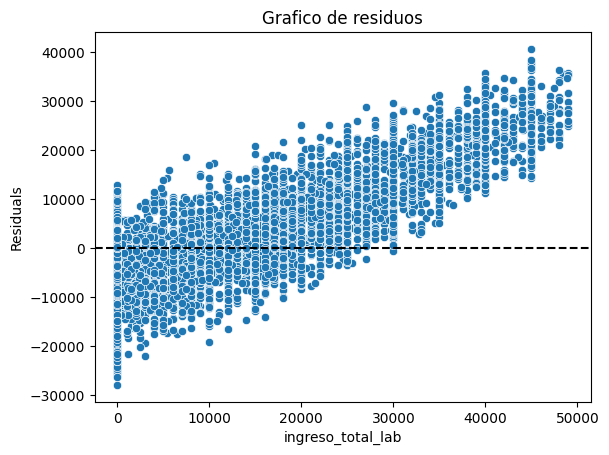

In [81]:
sns.scatterplot(x=dataframe['ingreso_total_lab'], y =dataframe['residuos'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ingreso_total_lab')
plt.ylabel('Residuals')
plt.title('Grafico de residuos')
plt.show()

In [82]:
dataframe['residuos'].describe()

count    13500.000000
mean        -0.000002
std      10127.080147
min     -27917.700000
25%      -7181.445000
50%      -1005.315000
75%       5596.675000
max      40700.450000
Name: residuos, dtype: float64

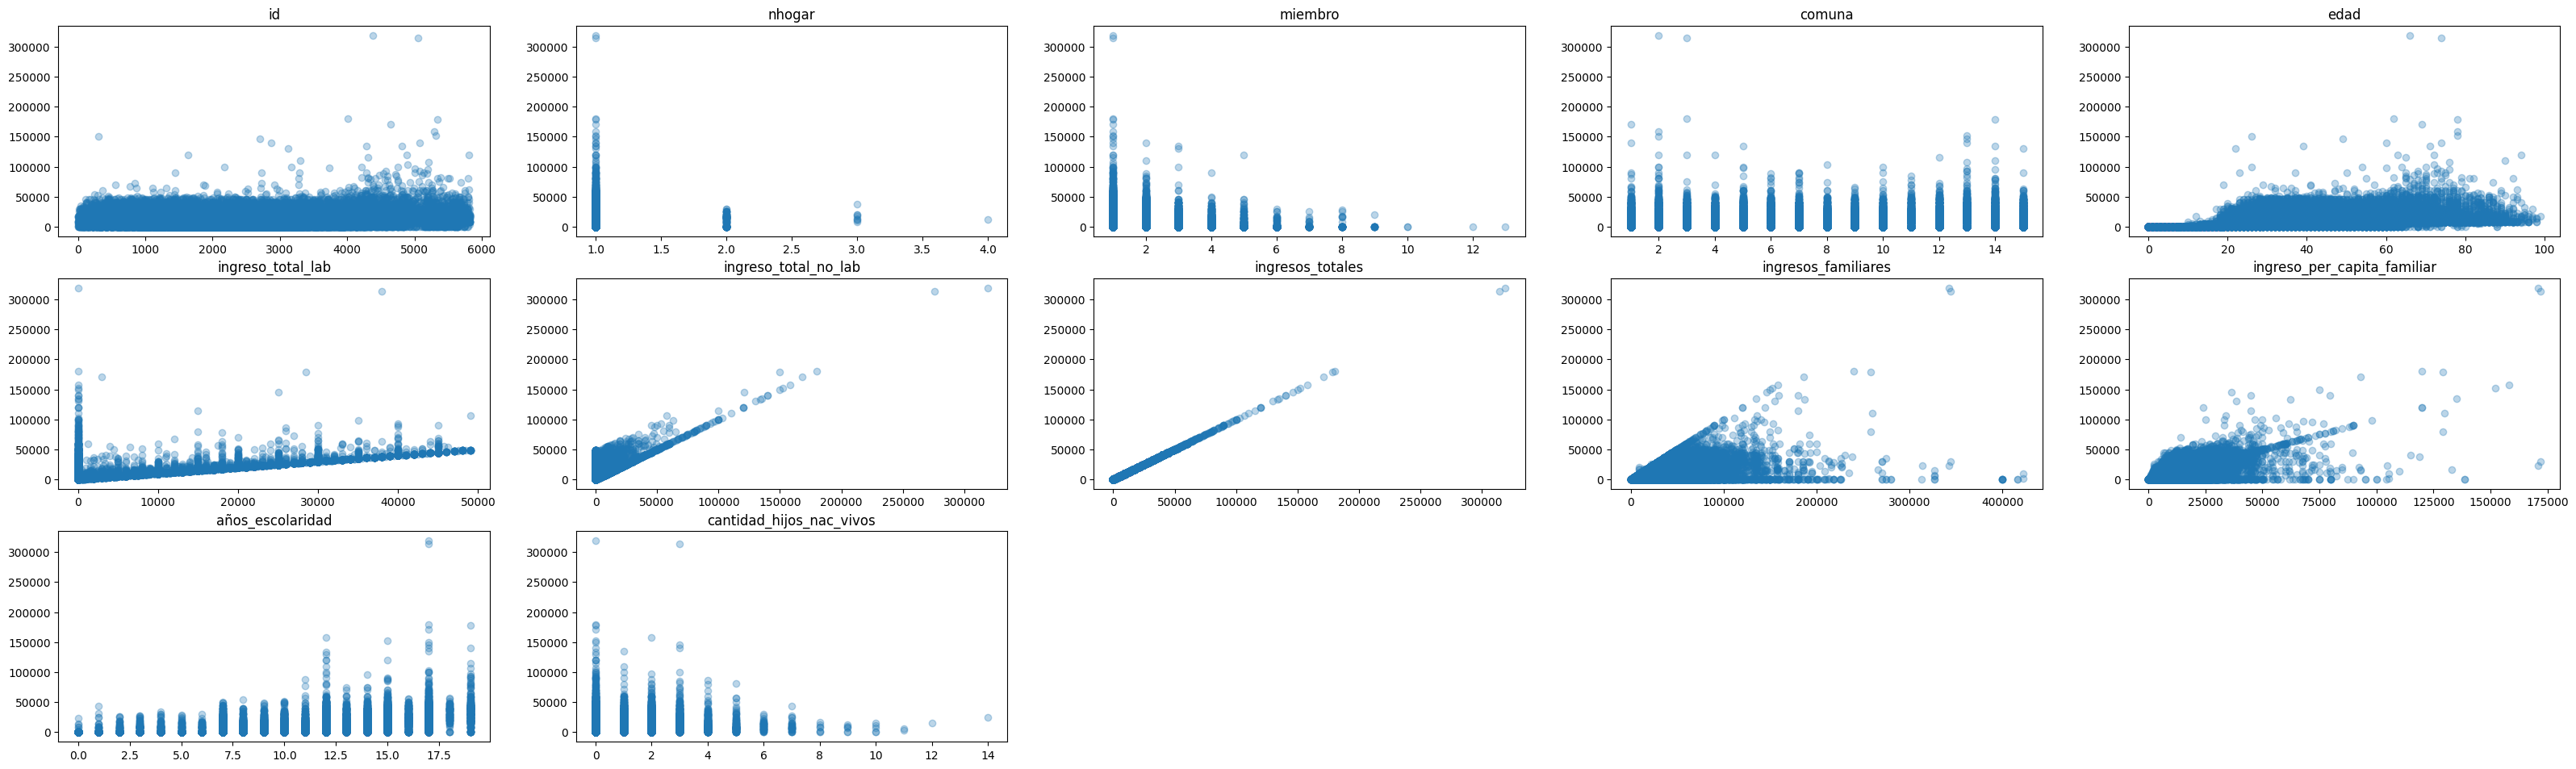

In [83]:
plt.figure(figsize=(40, 40))

for idx, col in enumerate(numerical_cols, start=1):  
    plt.subplot(10, 5, idx)
    plt.scatter(data=dataframe, x=col, y='ingresos_totales', alpha=.3)
    plt.title(col)